Iris 중에 versicolor, virginica, setosa 세 종류에 대한 꽃받침의 길이와 너비, 꽃잎의 길이와 너비 데이터를 사용해서 품종을 분류하는 것이 이번 챕터의 주제

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

In [5]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
# 데이터 설명 
\print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### seaborn의 parplot으로 iris 데이터 확인하기

In [8]:
# maplotlib와 함께 사용하는 것을 다양한 통계적 그래프를 그릴 수 있음
import seaborn as sns

D:\anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
D:\anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [11]:
iris_pd =sns.load_dataset('iris') # load_dataset명령어로 데이터 가져오기 
iris_pd.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


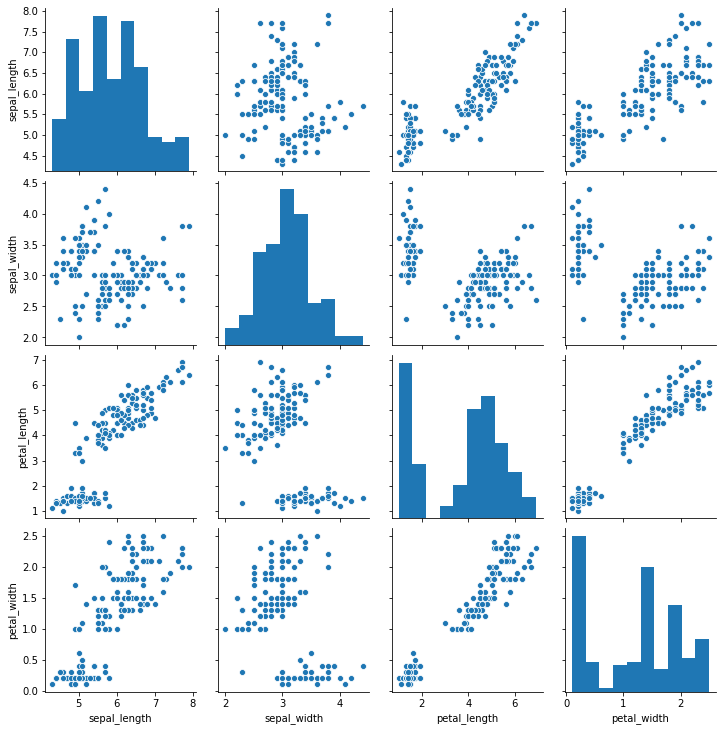

In [14]:
sns.pairplot(iris_pd)

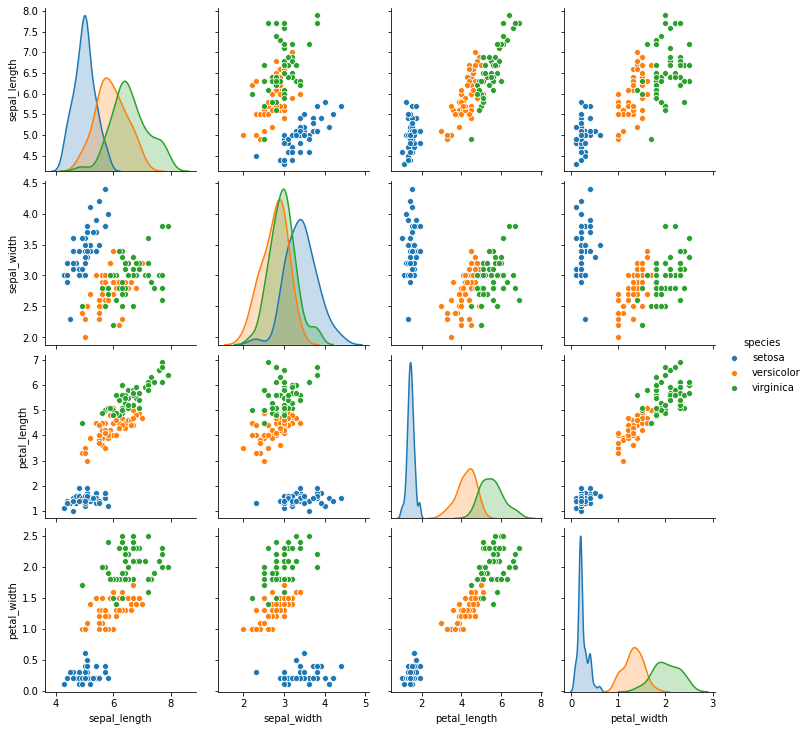

In [15]:
# iris의 네가지 특성을 가지고 16개의 비교그림을 한 번에 그려줌
# hue 옵션에 species를 적용하면 종별 구분 할 수 있움
sns.pairplot(iris_pd, hue='species')

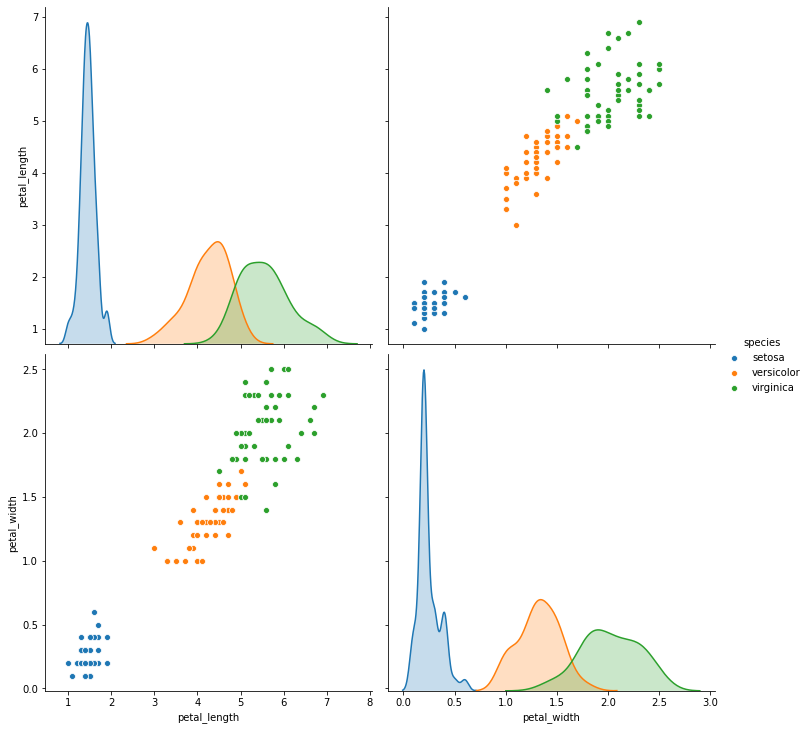

In [19]:
# 세 종을 가장 잘 구분할 수 있는 칼럼은 'petal_length', 'petal_width'
sns.pairplot(iris_pd, height=5, vars=['petal_length', 'petal_width'], hue='species')

### 간단한 결정나무 모델 구축

In [22]:
from sklearn.tree import DecisionTreeClassifier

X = iris.data[:, 2:]
y = iris.target

In [24]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=13)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=13)

In [28]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file = 'iris_tree.dot',
        feature_names = ['petal length', 'petal_width'],
        class_names = iris.target_names,
        rounded = True,
        filled = True
    )

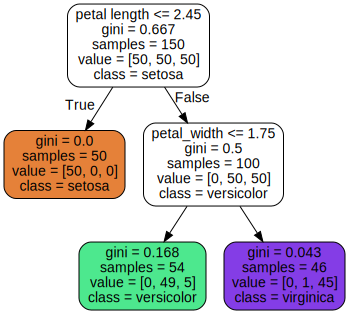

In [33]:
import graphviz # 블록선도와 같은 그림을 그리는데 유용 

with open('iris_tree.dot') as f:
    dot_graph = f.read()
    
dot = graphviz.Source(dot_graph)
dot.format ='png'
dot.render(filename='iris_tree', directory='./decison_trees', cleanup=True)
dot

setosa : 꽃잎의 길이가 2.45 이하  
versicolor : 꽃잎의 길이가 2.45이상이면서 꽃잎의 너비가 1.75 이하  
virginica : 꽃잎의 길이가 2.45 이상이면서 꽃잎의 너비가 1,75 이상

### 학습한 모델 사용하기 

In [34]:
tree_clf.predict_proba([[5, 1.5]]) # 꽃잎의 길이가 5cm, 너비가 1.5cm, 90.74%로 versicolor일 확률

array([[0.        , 0.90740741, 0.09259259]])

In [35]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [36]:
tree_clf.predict([[5, 1.5]])  #predict 함수를 사용해서 바로 결과 얻을 수 있음 

array([1])

In [37]:
iris.target_names[tree_clf.predict([[5, 1.5]])] #predict 함수를 사용해서 바로 결과 얻을 수 있음 

array(['versicolor'], dtype='<U10')